<a href="https://colab.research.google.com/github/ShilpaVasista/Exploratory-Data-Analytics/blob/main/grouping_datasets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

groupby()
- Data analysis often requires splitting data based on criteria.
- The groupby function in pandas is a powerful tool for splitting your data into groups, applying a function to each group, and then combining the results into a data structure.
- This “split-apply-combine” strategy allows you to easily perform operations like aggregations, transformations, and filtering on groups of data.

Key functionalities:
- Grouping by features (hierarchical).
- Aggregating datasets by groups.
- Applying custom aggregation functions.
- Transforming datasets group-wise.

The pandas groupby method performs two essential functions:
- It splits the data into groups based on some criteria.
- It applies a function to each group independently.

Requires a dataset with numerical and categorical data for effective grouping.


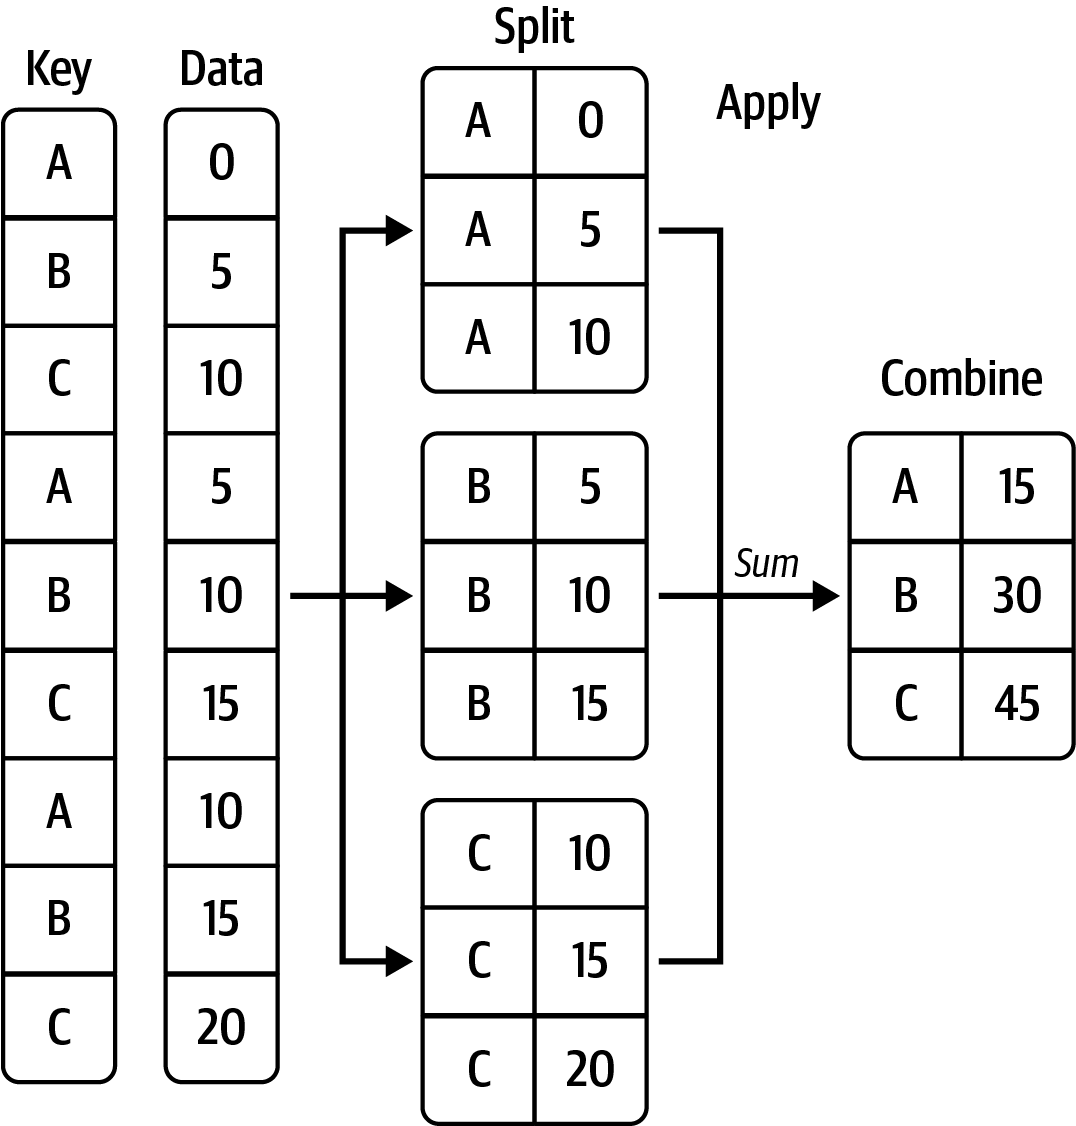

Example: Let's take a look at a dataset of automobiles that enlists the different features and attributes
of cars, such as symbolling, normalized-losses, make, aspiration, body-style,
drive-wheels, engine-location, and many others.

1. Let's start by importing the required Python libraries and datasets:

In [ ]:
import pandas as pd
df = pd.read_csv("Automobile_data.csv")
print("Head")
print(df.head(5))



Head
   symboling normalized-losses         make fuel-type aspiration num-of-doors  \
0          3                 ?  alfa-romero       gas        std          two   
1          3                 ?  alfa-romero       gas        std          two   
2          1                 ?  alfa-romero       gas        std          two   
3          2               164         audi       gas        std         four   
4          2               164         audi       gas        std         four   

    body-style drive-wheels engine-location  wheel-base  ...  engine-size  \
0  convertible          rwd           front        88.6  ...          130   
1  convertible          rwd           front        88.6  ...          130   
2    hatchback          rwd           front        94.5  ...          152   
3        sedan          fwd           front        99.8  ...          109   
4        sedan          4wd           front        99.4  ...          136   

   fuel-system  bore  stroke compression-rati

2. Using the groupby() function lets us group this dataset on the basis of the body-style column:

In [ ]:
print(df.groupby("body-style").head(3))
print(df.groupby("body-style").groups)
print(df.groupby("body-style").groups.keys())


    symboling normalized-losses           make fuel-type aspiration  \
0           3                 ?    alfa-romero       gas        std   
1           3                 ?    alfa-romero       gas        std   
2           1                 ?    alfa-romero       gas        std   
3           2               164           audi       gas        std   
4           2               164           audi       gas        std   
5           2                 ?           audi       gas        std   
7           1                 ?           audi       gas        std   
9           0                 ?           audi       gas      turbo   
18          2               121      chevrolet       gas        std   
28         -1               110          dodge       gas        std   
36          0                78          honda       gas        std   
69          0                93  mercedes-benz    diesel      turbo   
72          3               142  mercedes-benz       gas        std   
74    

From the preceding output, we know that the body-style column has five unique values:
  - convertible
  - hardtop
  - hatchback
  - sedan
  - wagon

**Accessing a Specific Group**

In [ ]:
style = df.groupby("body-style")
print(style.get_group("convertible"))

     symboling normalized-losses           make fuel-type aspiration  \
0            3                 ?    alfa-romero       gas        std   
1            3                 ?    alfa-romero       gas        std   
72           3               142  mercedes-benz       gas        std   
128          3                 ?        porsche       gas        std   
172          2               134         toyota       gas        std   
189          3                 ?     volkswagen       gas        std   

    num-of-doors   body-style drive-wheels engine-location  wheel-base  ...  \
0            two  convertible          rwd           front        88.6  ...   
1            two  convertible          rwd           front        88.6  ...   
72           two  convertible          rwd           front        96.6  ...   
128          two  convertible          rwd            rear        89.5  ...   
172          two  convertible          rwd           front        98.4  ...   
189          two  con

Explanation:

- Creates a DataFrameGroupBy object named "style".
- style.get_group("convertible") retrieves the DataFrame containing only "convertible" body styles.

- In the preceding example, we have grouped by using a single body-style column.
- We can also select a subset of columns.

Selecting a subset of columns:

- To form groups based on multiple categories, we can simply specify the column names in the groupby() function.
- Grouping will be done simultaneously with the first category, the second category, and so on.

In [ ]:
double_grouping = df.groupby(["body-style","drive-wheels"])
double_grouping.first()

symboling normalized-losses           make  \
body-style  drive-wheels                                               
convertible fwd                   3                 ?     volkswagen   
            rwd                   3                 ?    alfa-romero   
hardtop     fwd                   2               168         nissan   
            rwd                   0                93  mercedes-benz   
hatchback   4wd                   0                 ?           audi   
            fwd                   2               121      chevrolet   
            rwd                   1                 ?    alfa-romero   
sedan       4wd                   2               164           audi   
            fwd                   2               164           audi   
            rwd                   2               192            bmw   
wagon       4wd                   0                85         subaru   
            fwd                   1                 ?           audi   
            rwd                  -1                93  mercedes-benz   

                         fuel-type aspiration num-of-doors engine-location  \
body-style  drive-wheels                                                     
convertible fwd                gas        std          two           front   
            rwd                gas        std          two           front   
hardtop     fwd                gas        std          two           front   
            rwd             diesel      turbo          two           front   
hatchback   4wd                gas      turbo          two           front   
            fwd                gas        std          two           front   
            rwd                gas        std          two           front   
sedan       4wd                gas        std         four           front   
            fwd                gas        std         four           front   
            rwd                gas        std          two           front   
wagon       4wd                gas        std         four           front   
            fwd                gas        std         four           front   
            rwd             diesel      turbo         four           front   

                          wheel-base  length  width  ...  engine-size  \
body-style  drive-wheels                             ...                
convertible fwd                 94.5   159.3   64.2  ...          109   
            rwd                 88.6   168.8   64.1  ...          130   
hardtop     fwd                 95.1   162.4   63.8  ...           97   
            rwd                106.7   187.5   70.3  ...          183   
hatchback   4wd                 99.5   178.2   67.9  ...          131   
            fwd                 88.4   141.1   60.3  ...           61   
            rwd                 94.5   171.2   65.5  ...          152   
sedan       4wd                 99.4   176.6   66.4  ...          136   
            fwd                 99.8   176.6   66.2  ...          109   
            rwd                101.2   176.8   64.8  ...          108   
wagon       4wd                 96.9   173.6   65.4  ...          108   
            fwd                105.8   192.7   71.4  ...          136   
            rwd                110.0   190.9   70.3  ...          183   

                          fuel-system  bore stroke  compression-ratio  \
body-style  drive-wheels                                                
convertible fwd                  mpfi  3.19    3.4                8.5   
            rwd                  mpfi  3.47   2.68                9.0   
hardtop     fwd                  2bbl  3.15   3.29                9.4   
            rwd                   idi  3.58   3.64               21.5   
hatchback   4wd                  mpfi  3.13    3.4                7.0   
            fwd                  2bbl  2.91   3.03                9.5   
            rwd                  mpfi  2.68   3.47                9.0   
sedan       4wd      

Aggregation on Grouped Data

Pandas allows applying arithmetic operations directly to grouped data.
Common aggregation functions:
- max(): Maximum value.
- min(): Minimum value.
- mean(): Average value.
- first(): First value.
- last(): Last value.

In [ ]:
style['normalized-losses'].max()

,normalized-losses
body-style,
convertible,?
hardtop,?
hatchback,?
sedan,?
wagon,?


In [ ]:
style['normalized-losses'].min()

,normalized-losses
body-style,
convertible,134
hardtop,134
hatchback,101
sedan,102
wagon,103


In [ ]:
style.mean()

TypeError: agg function failed [how->mean,dtype->object]

In [ ]:
# get mean of each column of specific group
style.get_group("convertible").mean()

TypeError: Could not convert ['??142?134?' 'alfa-romeroalfa-romeromercedes-benzporschetoyotavolkswagen'
 'gasgasgasgasgasgas' 'stdstdstdstdstdstd' 'twotwotwotwotwotwo'
 'convertibleconvertibleconvertibleconvertibleconvertibleconvertible'
 'rwdrwdrwdrwdrwdfwd' 'frontfrontfrontrearfrontfront'
 'dohcdohcohcvohcfohcohc' 'fourfoureightsixfourfour'
 'mpfimpfimpfimpfimpfimpfi' '3.473.473.463.743.623.19'
 '2.682.683.12.93.53.4' '11111115520711690' '500050004750590048005500'
 '134951650035056370281766911595'] to numeric

In [ ]:
# get the number of symboling/records in each group
style['symboling'].count()

,symboling
body-style,
convertible,6
hardtop,8
hatchback,70
sedan,96
wagon,25


In [ ]:
import pandas as pd

data = {'group' : ['A', 'B', 'C', 'A', 'B', 'C', 'A', 'B', 'C'],
        'values' : ["0", "5", "10", "?", "10", "15", "10", "15", "20"]}
df_data = pd.DataFrame(data)
print(df_data)

print(df_data.info())

grouped_df = df_data.groupby('group')

print("\nMaximum")
print(grouped_df['values'].max())

print("\nMinimum")
print(grouped_df['values'].min())

  group values
0     A      0
1     B      5
2     C     10
3     A      ?
4     B     10
5     C     15
6     A     10
7     B     15
8     C     20
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   group   9 non-null      object
 1   values  9 non-null      object
dtypes: object(2)
memory usage: 276.0+ bytes
None

Maximum
group
A     ?
B     5
C    20
Name: values, dtype: object

Minimum
group
A     0
B    10
C    10
Name: values, dtype: object


- Lexicographical Order: When you compare strings like "10" and "5", the comparison is done character by character. "10" is considered smaller than "5" because "1" comes before "5" in the ASCII table. This is the opposite of how we compare numbers.
- No Numerical Operations: You cannot perform standard arithmetic operations (sum, mean, etc.) on strings. Trying to sum "10" and "5" as strings will result in "105" (concatenation) or a TypeError.
- Meaningless Results: The min and max functions, when applied to strings, give you the lexicographically smallest and largest strings, which have no numerical meaning.

In [ ]:
import pandas as pd
import numpy as np
data = {'group' : ['A', 'B', 'C', 'A', 'B', 'C', 'A', 'B', 'C'],
        'values' : ["0", "5", "10", "?", "10", "15", "10", "15", "20"]}
df_data = pd.DataFrame(data)
print(df_data)

df_data['values'] = df_data['values'].replace("?",np.nan)
df_data['values'] = df_data['values'].astype(float)
print(df_data)

print(df_data.info())

grouped_df = df_data.groupby('group')
print(grouped_df.groups)

print("\nMaximum")
print(grouped_df['values'].max())

print("\nMinimum")
print(grouped_df['values'].min())

print("\nMean")
print(grouped_df['values'].mean())

print("\nMedian")
print(grouped_df['values'].median())

print("\nStandard Deviation")
print(grouped_df['values'].std())

  group values
0     A      0
1     B      5
2     C     10
3     A      ?
4     B     10
5     C     15
6     A     10
7     B     15
8     C     20
  group  values
0     A     0.0
1     B     5.0
2     C    10.0
3     A     NaN
4     B    10.0
5     C    15.0
6     A    10.0
7     B    15.0
8     C    20.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   group   9 non-null      object 
 1   values  8 non-null      float64
dtypes: float64(1), object(1)
memory usage: 276.0+ bytes
None
{'A': [0, 3, 6], 'B': [1, 4, 7], 'C': [2, 5, 8]}

Maximum
group
A    10.0
B    15.0
C    20.0
Name: values, dtype: float64

Minimum
group
A     0.0
B     5.0
C    10.0
Name: values, dtype: float64

Mean
group
A     5.0
B    10.0
C    15.0
Name: values, dtype: float64

Median
group
A     5.0
B    10.0
C    15.0
Name: values, dtype: float64

Standard Deviation
group
A    7.071068